# GSS Data Study

## Download and Prepare Data

The data can be get from [GSS website](https://gss.norc.org/Get-The-Data)   
There are different format of data file, namely SPSS, STATA and SAS. For SAS format data many are missing. Only SPSS and STATA has full set of data.  The STATA data is smaller in file size, so we download file in this format.  
Pandas support to read data in all those different formats. So it should be no problem for us to use pandas to analyze the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import pathlib

path = pathlib.Path('D:/Edu/data_resource/dataset-GSS')
filepath = path/'gss2014merged_r10 - stata.dta'

Read the data in file into pandas dataframe:

In [3]:
df_gss_data = pd.read_stata(filepath, convert_categoricals=False)
df_gss_data

,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,OCC10,prestg10,...,othgayw,clsnjobm,othnjobm,clsnjobw,othnjobw,clspolm,othpolm,clspolw,othpolw,copres105plus
0,2014,1,1.0,60.0,NaN,NaN,1.0,2.0,220.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,2,1.0,40.0,NaN,NaN,2.0,2.0,700.0,51.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,3,4.0,NaN,NaN,NaN,2.0,2.0,8740.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,4,2.0,20.0,NaN,NaN,2.0,2.0,50.0,53.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,5,5.0,NaN,NaN,1.0,2.0,1.0,800.0,60.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,2014,11300,1.0,50.0,NaN,NaN,2.0,1.0,5700.0,47.0,...,4.0,NaN,NaN,NaN,NaN,3.0,2.0,1.0,1.0,NaN
3838,2014,11301,5.0,NaN,NaN,1.0,2.0,2.0,4700.0,38.0,...,0.0,1.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
3839,2014,11302,2.0,24.0,NaN,NaN,2.0,2.0,5620.0,25.0,...,6.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN
3840,2014,11303,2.0,30.0,NaN,NaN,2.0,2.0,430.0,39.0,...,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [4]:
df_gss_data.shape

(3842, 1001)

In [4]:
df_gss_data.columns

Index(['year', 'id', 'wrkstat', 'hrs1', 'hrs2', 'evwork', 'wrkslf', 'wrkgovt',
       'OCC10', 'prestg10',
       ...
       'othgayw', 'clsnjobm', 'othnjobm', 'clsnjobw', 'othnjobw', 'clspolm',
       'othpolm', 'clspolw', 'othpolw', 'copres105plus'],
      dtype='object', length=1001)

The column of 'id' we do not need as pandas already added one column of id number automatically.

In [5]:
df_gss_data.drop('id',1,inplace=True)
df_gss_data.head()

,year,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,OCC10,prestg10,prestg105plus,...,othgayw,clsnjobm,othnjobm,clsnjobw,othnjobw,clspolm,othpolm,clspolw,othpolw,copres105plus
0,2014,1.0,60.0,NaN,NaN,1.0,2.0,220.0,53.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,1.0,40.0,NaN,NaN,2.0,2.0,700.0,51.0,75.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,4.0,NaN,NaN,NaN,2.0,2.0,8740.0,39.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,2.0,20.0,NaN,NaN,2.0,2.0,50.0,53.0,73.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,5.0,NaN,NaN,1.0,2.0,1.0,800.0,60.0,85.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_gss_data.to_csv('gss2014merged.csv')

After save the data in dataframe to a .csv file, we can use excel, or any text editor software, to open the file and have a look at the data.

## Univariate Data

There is one column in the GSS data, which is 'age'. Let's check this data.

In [7]:
df_gss_data['age'].dtype

dtype('float64')

In [8]:
df_gss_data['age'].isna().any()

True

There are some data NaN.

In [9]:
na_index = df_gss_data['age'].index[df_gss_data['age'].isna()]
na_index

Int64Index([  30,   98,  834, 1266, 1319, 1531, 1627, 2104, 2141, 2560, 2568,
            2629, 2684, 2800, 2824, 2849, 2858, 2955, 2980, 3029, 3309, 3526,
            3693, 3752],
           dtype='int64')

In [10]:
problem_data = df_gss_data.loc[[30,   98,  834, 1266, 1319, 1531, 1627, 2104, 2141, 2560, 2568,
            2629, 2684, 2800, 2824, 2849, 2858, 2955, 2980, 3029, 3309, 3526,
            3693, 3752],['sibs', 'childs', 'age', 'agekdbrn']]
problem_data

,sibs,childs,age,agekdbrn
30,2.0,0.0,NaN,NaN
98,2.0,1.0,NaN,35.0
834,6.0,0.0,NaN,NaN
1266,3.0,NaN,NaN,NaN
1319,NaN,NaN,NaN,NaN
1531,2.0,0.0,NaN,NaN
1627,3.0,2.0,NaN,30.0
2104,1.0,3.0,NaN,25.0
2141,1.0,0.0,NaN,NaN
2560,1.0,2.0,NaN,42.0


In [11]:
problem_data.shape

(24, 4)

In [12]:
good_age_data = df_gss_data[~df_gss_data['age'].isna()][['sibs','childs','age','agekdbrn']]
good_age_data

,sibs,childs,age,agekdbrn
0,3.0,0.0,53.0,NaN
1,3.0,0.0,26.0,NaN
2,3.0,1.0,59.0,27.0
3,3.0,2.0,56.0,38.0
4,0.0,3.0,74.0,24.0
...,...,...,...,...
3837,1.0,2.0,52.0,23.0
3838,5.0,2.0,70.0,21.0
3839,4.0,2.0,48.0,18.0
3840,2.0,1.0,61.0,23.0


In [13]:
good_age_data.describe()

,sibs,childs,age,agekdbrn
count,3810.000000,3811.000000,3818.000000,2789.000000
mean,3.665617,1.861191,49.837611,24.371459
std,2.928571,1.623124,17.047940,6.115553
min,0.000000,0.000000,18.000000,12.000000
25%,2.000000,0.000000,36.000000,20.000000
50%,3.000000,2.000000,50.000000,23.000000
75%,5.000000,3.000000,62.000000,28.000000
max,25.000000,8.000000,89.000000,57.000000


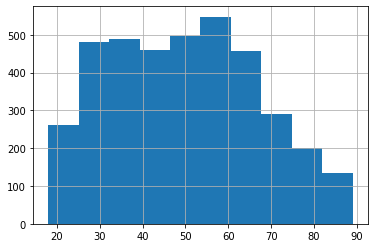

In [13]:
import matplotlib.pyplot as plt

good_age_data['age'].hist()
plt.show()

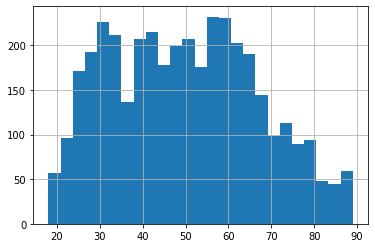

In [14]:
good_age_data['age'].hist(bins=25)
plt.show()

From the age distribution of all people reported, seems low age was blocked from report, because it was a sharp decrease at the low age side.

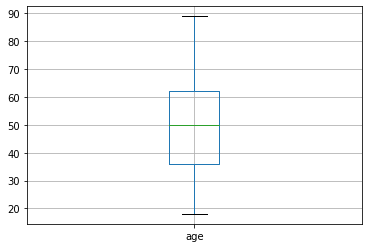

In [15]:
good_age_data[['age']].boxplot()
plt.show()

## Another Column

Let's check the 'income' column data.

In [16]:
df_gss_data['income'].dtype

dtype('float64')

In [17]:
df_gss_data['income'].isna().any()

True

In [18]:
na_index = df_gss_data['income'].index[df_gss_data['income'].isna()]
na_index

Int64Index([   4,    6,   21,   33,   35,   40,   42,   43,   73,   98,
            ...
            3738, 3743, 3744, 3750, 3784, 3789, 3792, 3796, 3821, 3828],
           dtype='int64', length=304)

We have 304 rows data which income is NaN.  
We want join the income data and age data together, get all 2 columns data which are both valid.

In [19]:
good_age_income_data = df_gss_data[['age','income']].dropna()
good_age_income_data

,age,income
0,53.0,12.0
1,26.0,12.0
2,59.0,12.0
3,56.0,12.0
5,56.0,12.0
...,...,...
3837,52.0,12.0
3838,70.0,9.0
3839,48.0,8.0
3840,61.0,2.0


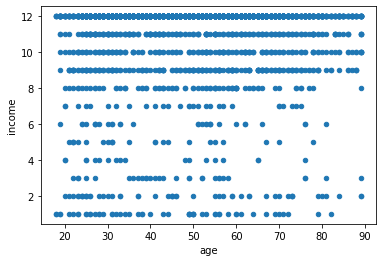

In [20]:
good_age_income_data.plot(kind='scatter',x='age',y='income')
plt.show()

It seems there are less people with the middle income. More people are with high income above 8 (number 9 means family income above \$10,000 according to GSS codebook)  
scatter plot cannot reveal much valuable information. let's check other plot.

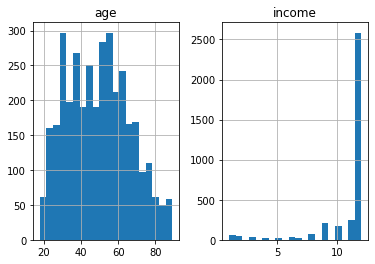

In [21]:
good_age_income_data.hist(bins=20)
plt.show()

When we saw this histgram, we notice that most of the data is giving '12' which means family income more than \$25,000. Thus the questionnaire should be revised maybe more segments in order to get more details of the income distribution.

## Decorations to the Plot

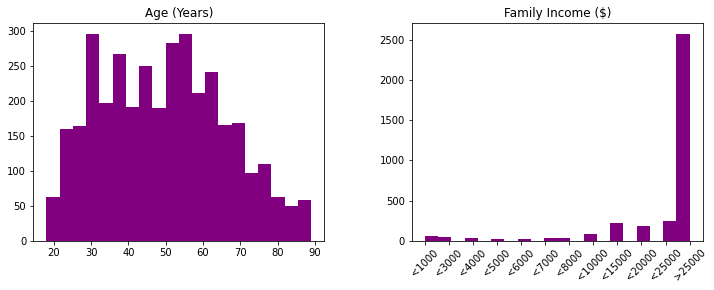

In [22]:
ax_list = good_age_income_data.hist(bins=20, figsize=(12,4), color='purple')
ax1 = ax_list[0, 0]
ax2 = ax_list[0, 1]
ax1.set_title('Age (Years)')
#ax1.locator_params(axis='x',nbins=10)
ax2.set_title('Family Income ($)')
ax2.set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax2.set_xticklabels(['<1000','<3000','<4000','<5000','<6000','<7000','<8000','<10000','<15000','<20000','<25000','>25000'], rotation = 45)
ax1.grid()
ax2.grid()
plt.show()

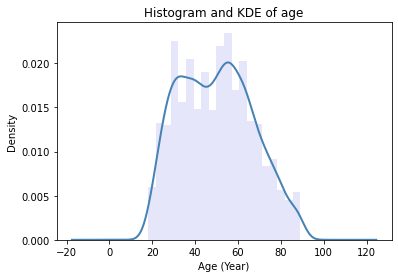

In [23]:
age_good_data = df_gss_data['age'].dropna()
ax = age_good_data.hist(bins=20,color='lavender', density=True)
age_good_data.plot(kind='kde', lw=2, color='steelblue',ax=ax)
ax.set_title('Histogram and KDE of age')
ax.set_xlabel('Age (Year)')
plt.show()

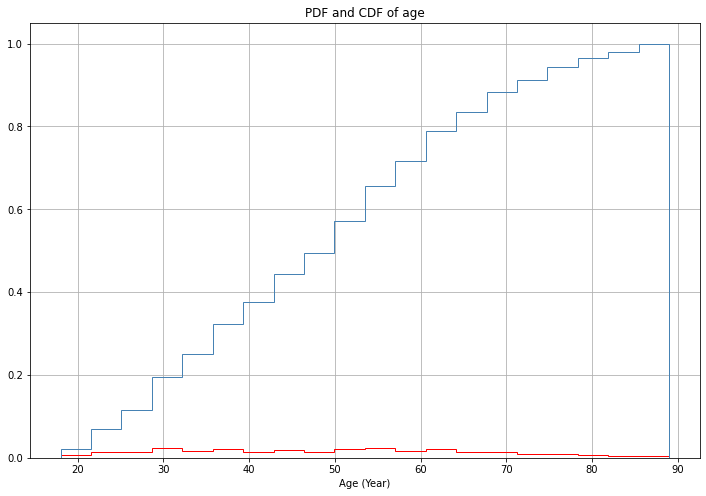

In [24]:
ax = age_good_data.hist(bins=20,color='red', density=True, histtype='step',figsize=(12,8))
age_good_data.hist(bins=20,cumulative=True, density=True, color='steelblue',histtype='step',ax=ax)
ax.set_title('PDF and CDF of age')
ax.set_xlabel('Age (Year)')
plt.show()

## Study Data in Groups

Let's check the column of 'rincome', which is personal income.

In [20]:
df_gss_data['rincome'].dtype

dtype('float64')

In [21]:
df_gss_data['rincome'].isna().any()

True

In [22]:
na_index = df_gss_data['rincome'].index[df_gss_data['rincome'].isna()]
na_index

Int64Index([   2,    4,    6,    8,   10,   11,   12,   21,   22,   23,
            ...
            3818, 3824, 3826, 3828, 3830, 3832, 3833, 3838, 3839, 3840],
           dtype='int64', length=1509)

1509 person when submitting the data, did not give their personal income. Much more than those who did not submit the family income.

In [27]:
df_gss_data['sex'].dtype

dtype('int8')

In [28]:
df_gss_data['sex'].isna().any()

False

Every person who give response, give their gender information.

In [25]:
df_income_sex = df_gss_data[['rincome', 'sex']].dropna()
df_income_sex.shape

(2333, 2)

In [26]:
df_income_sex

,rincome,sex
0,12.0,1
1,12.0,2
3,9.0,2
5,12.0,2
7,12.0,1
...,...,...
3834,12.0,2
3835,12.0,1
3836,12.0,1
3837,12.0,2


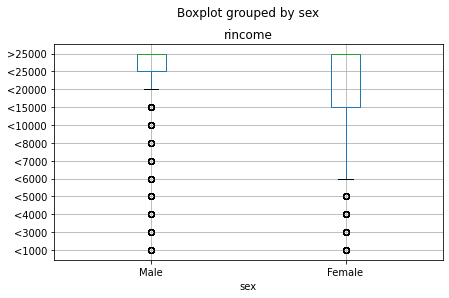

In [35]:
ax = df_income_sex.boxplot(column='rincome', by='sex')
ax.set_position([0.05, 0.1, 0.9, 0.75])
ax.set_xticklabels(['Male', 'Female'])
ax.set_yticks([1,2,3,4,5,6,7,8,9,10,11,12])
ax.set_yticklabels(['<1000','<3000','<4000','<5000','<6000','<7000','<8000','<10000','<15000','<20000','<25000','>25000'])
plt.show()

From the responded valid data, all male person income above 15000. Lower than 15000 are all female.

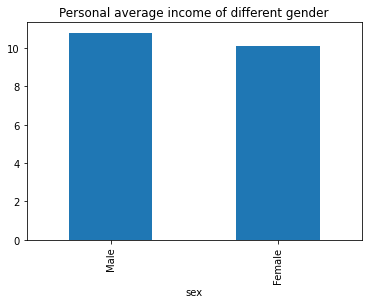

In [48]:
average_income = df_income_sex.groupby(['sex']).agg(['mean'])
ax = average_income.plot(kind='bar')
ax.set_xticklabels(['Male', 'Female'])
ax.get_legend().remove()
ax.set_title('Personal average income of different gender')
plt.show()